In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('datawithnewcols.csv',index_col = 0)

In [7]:
# Explore it
numerical_cols = []
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        numerical_cols.append(col)

len(numerical_cols), numerical_cols

(29,
 ['id',
  'price',
  'bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'waterfront',
  'view',
  'condition',
  'grade',
  'sqft_above',
  'sqft_basement',
  'yr_built',
  'yr_renovated',
  'zipcode',
  'lat',
  'long',
  'sqft_living15',
  'sqft_lot15',
  'Age_of_House',
  'Years_last_renovation',
  'basement',
  'biggerliving',
  'biggerlot',
  'distance_from_seattle',
  'distance_from_bellevue',
  'distance_from_a_city',
  'distance_from_airport'])

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport
0,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7639,69,29,1,1,0,12.613856,15.150174,12.613856,30.859494
1,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,8062,87,87,0,0,1,16.333282,14.375822,14.375822,33.112379
2,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,5000,55,55,1,1,0,10.617501,17.522706,10.617501,10.988905
3,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,7503,33,33,0,0,1,21.759524,11.683886,11.683886,27.230991
4,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,101930,19,19,1,1,0,25.295727,15.508940,15.508940,32.449837


In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_lot15,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport
count,1.922100e+04,1.922100e+04,19221.000000,19221.000000,19221.000000,1.922100e+04,19221.000000,19221.000000,19221.000000,19221.000000,...,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000
mean,4.592301e+09,5.416398e+05,3.374642,2.117072,2082.420894,1.507376e+04,1.495031,0.007596,0.230373,3.409968,...,12806.692108,48.960200,47.039748,0.384944,0.456844,0.399303,18.561477,17.275517,15.357939,21.621724
std,2.876995e+09,3.722478e+05,0.928539,0.769576,922.544859,4.081729e+04,0.540155,0.086825,0.762339,0.650280,...,27576.842373,29.384666,28.966522,0.486595,0.498147,0.489768,10.739059,9.098646,9.873827,9.602891
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,651.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.235977,0.303167,0.303167,0.973432
25%,2.124049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,5100.000000,23.000000,21.000000,0.000000,0.000000,0.000000,9.755045,11.340352,8.008292,13.406358
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,7620.000000,45.000000,43.000000,0.000000,0.000000,0.000000,16.611524,15.198443,12.818211,21.699382
75%,7.334501e+09,6.440000e+05,4.000000,2.500000,2550.000000,1.071600e+04,2.000000,0.000000,0.000000,4.000000,...,10092.000000,69.000000,66.000000,1.000000,1.000000,1.000000,25.513835,21.312309,19.917830,28.712338
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,871200.000000,120.000000,120.000000,1.000000,1.000000,1.000000,77.240209,67.260521,67.260521,79.793415


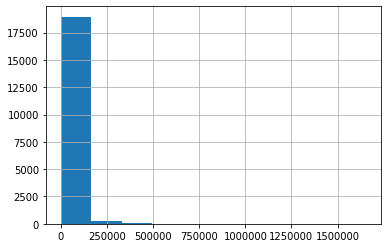

In [10]:
df['sqft_lot'].hist()

In [11]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Age_of_House',
       'Years_last_renovation', 'basement', 'biggerliving', 'biggerlot',
       'distance_from_seattle', 'distance_from_bellevue',
       'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [12]:
corr = df.drop('price',axis=1).corr()

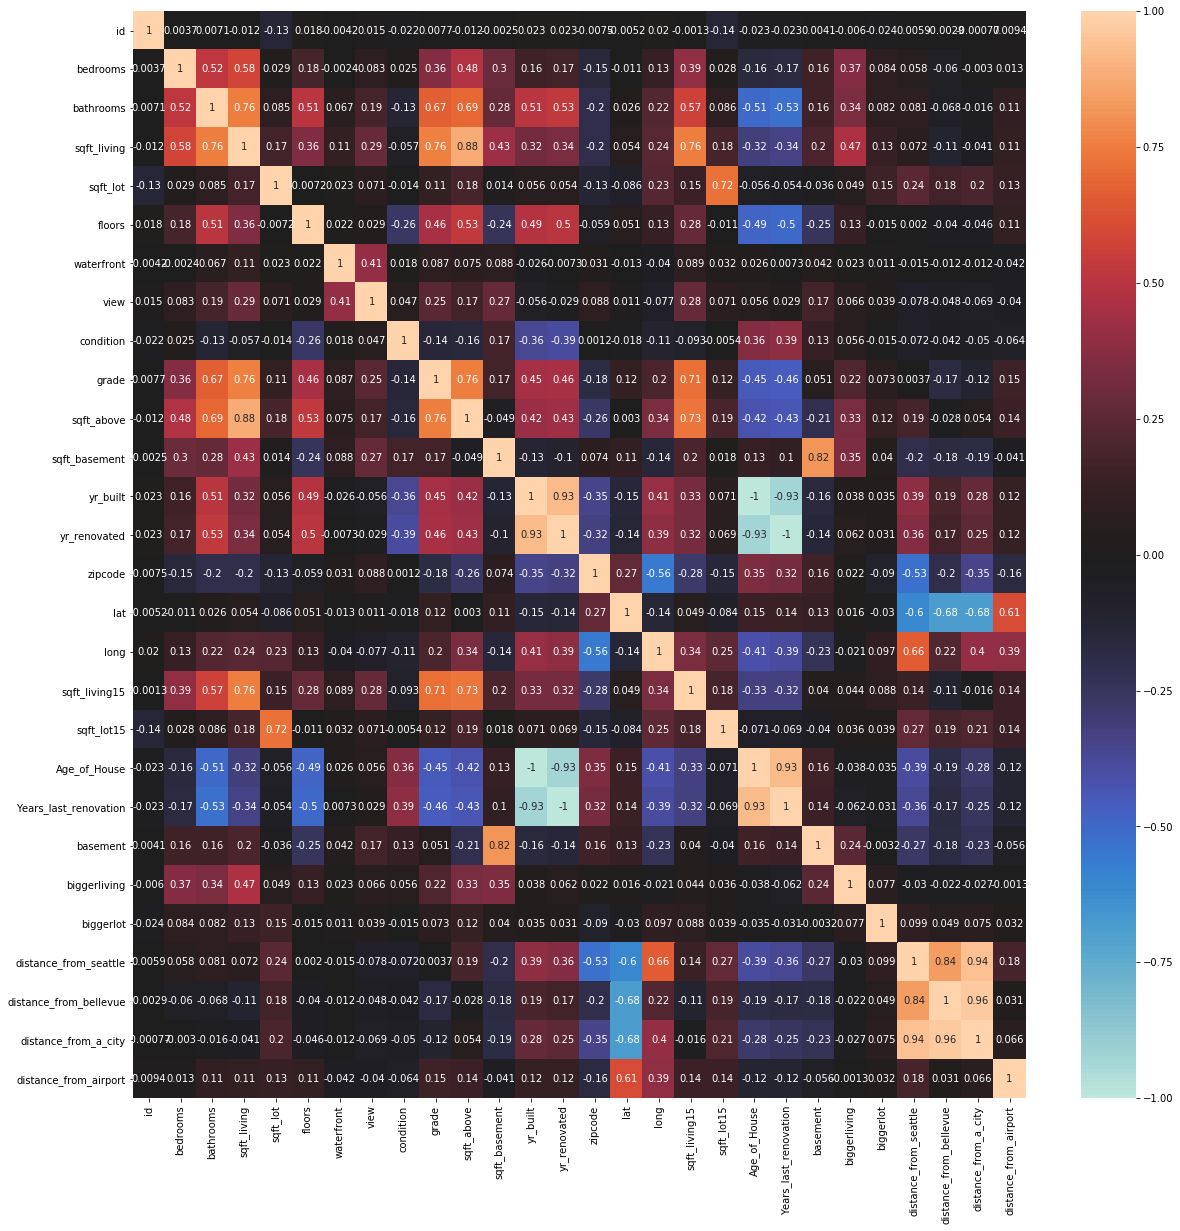

In [13]:
# Your code here
plt.figure(figsize=(20,20))
sns.heatmap(corr, center=0, annot=True);
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [74]:
# Deleting Columns I think will be an issue

In [14]:
df.drop(['yr_built','yr_renovated','id','sqft_above','sqft_basement','lat','long','distance_from_seattle','distance_from_bellevue','sqft_living15','sqft_lot15'],axis=1,inplace = True)

In [15]:
corr1 = df.drop('price',axis=1).corr()

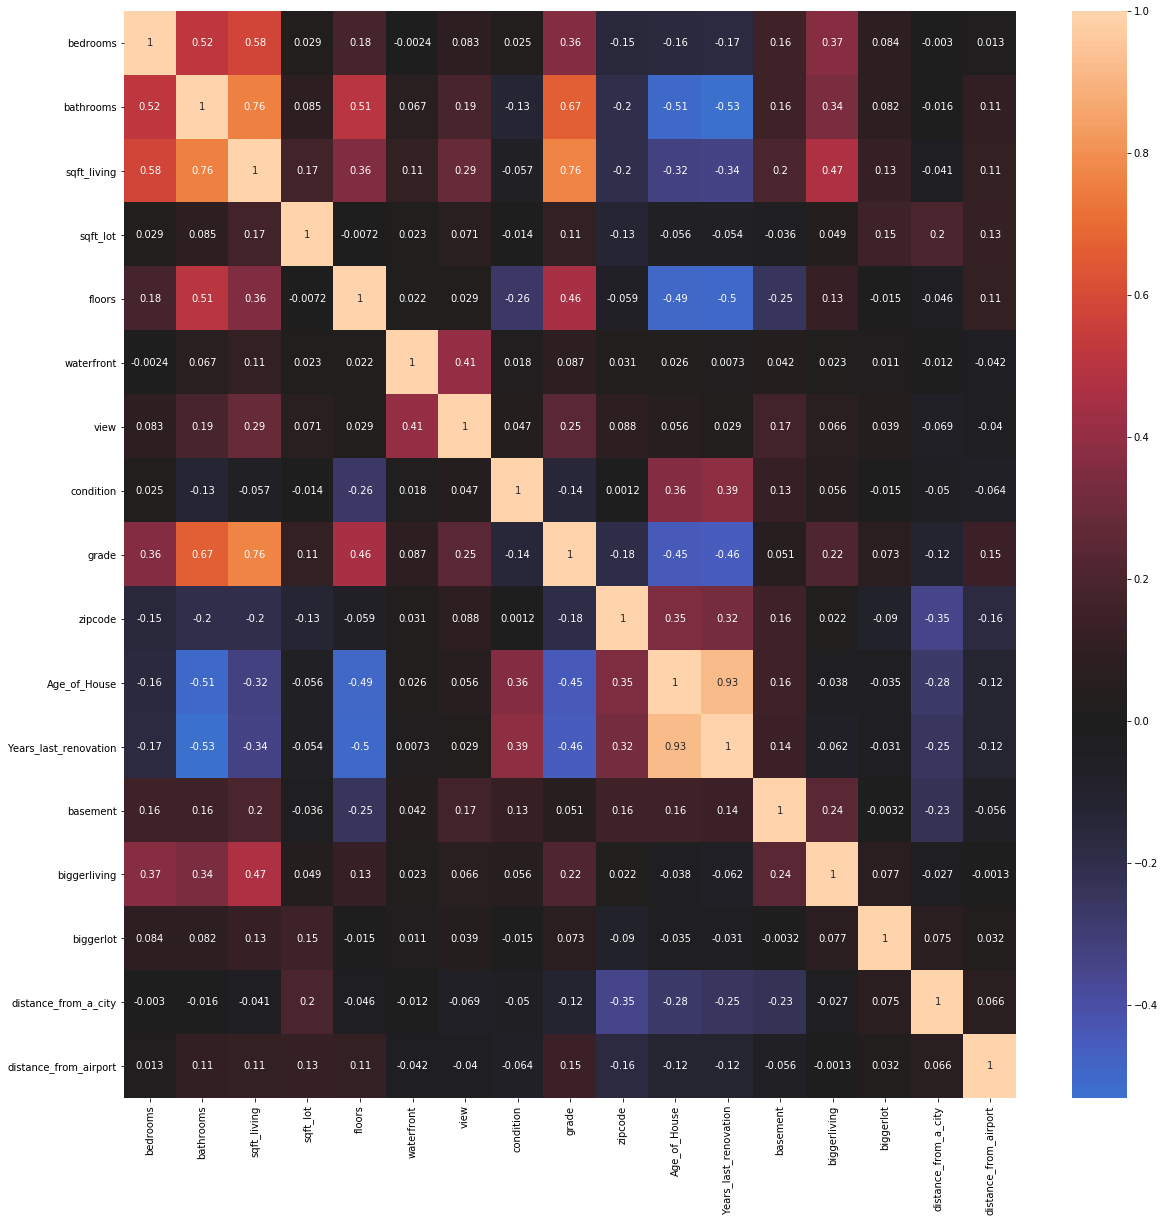

In [16]:
# Your code here
plt.figure(figsize=(20,20))
sns.heatmap(corr1, center=0, annot=True);
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [17]:
# Explore it
numerical_cols = []
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        numerical_cols.append(col)

len(numerical_cols), numerical_cols

(18,
 ['price',
  'bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'waterfront',
  'view',
  'condition',
  'grade',
  'zipcode',
  'Age_of_House',
  'Years_last_renovation',
  'basement',
  'biggerliving',
  'biggerlot',
  'distance_from_a_city',
  'distance_from_airport'])

In [18]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [19]:
numericals = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','Age_of_House', 'Years_last_renovation','distance_from_a_city', 'distance_from_airport']

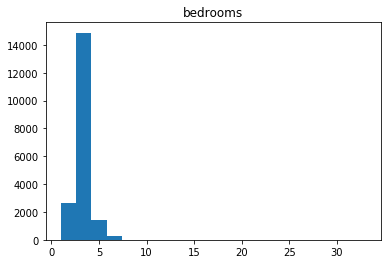

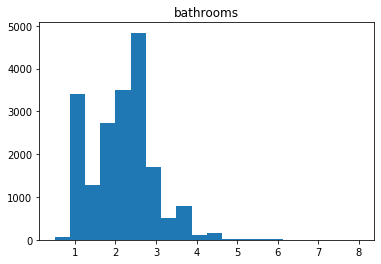

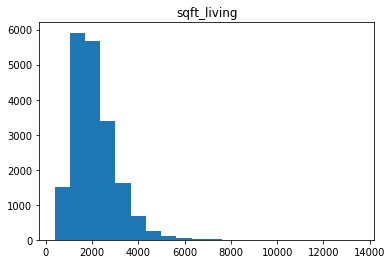

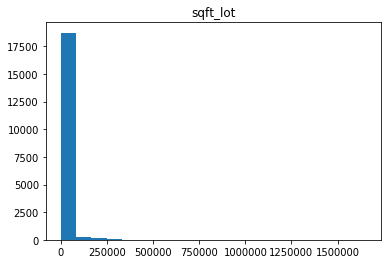

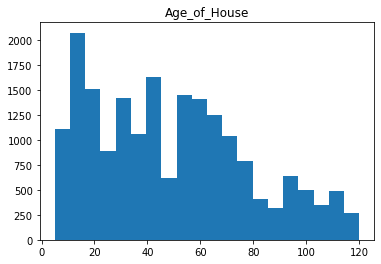

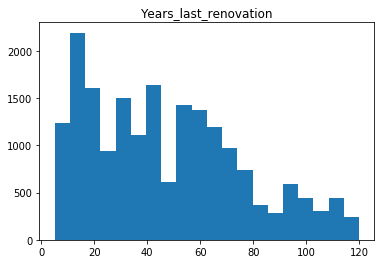

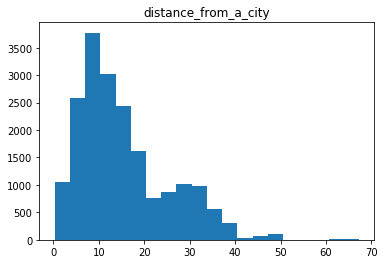

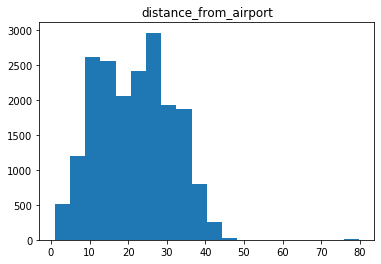

In [20]:
for col in numericals:
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.show()

In [44]:
numericals

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'Age_of_House',
 'Years_last_renovation',
 'distance_from_a_city',
 'distance_from_airport']

In [21]:
df.to_csv('data_correlation_gone.csv')

In [59]:
numericals = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','Age_of_House', 'Years_last_renovation','distance_from_a_city', 'distance_from_airport']

In [60]:
def norm_feat(series):
    return (series - series.mean())/series.std()


In [61]:
for feat in numericals:
    df[feat] = norm_feat((df[feat]))


In [62]:
df.reset_index(drop=True,inplace=True)

In [63]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.378652,0.300253,0.829689,-0.227077,2.0,0.0,0.0,3,7,98125,0.661504,-0.644230,1,1,0,-0.249526,1.041175
1,2015-02-25,180000.0,-1.549166,-1.506346,-1.595932,0.012078,1.0,0.0,0.0,3,6,98028,1.271581,1.344265,0,0,1,-0.054656,1.283006
2,2014-12-09,604000.0,0.791862,1.384213,0.007673,-0.421487,1.0,0.0,0.0,5,7,98136,0.187000,0.247164,1,1,0,-0.470318,-1.091792
3,2015-02-18,510000.0,-0.378652,-0.061067,-0.369646,-0.154411,1.0,0.0,0.0,3,8,98074,-0.558651,-0.507093,0,0,1,-0.352378,0.651681
4,2014-06-27,257500.0,-0.378652,0.300253,-0.322481,-0.263756,2.0,0.0,0.0,3,7,98003,-0.829796,-0.781368,0,0,0,2.022363,-0.661723


In [64]:
df.to_csv('data_correlation_gone_norm.csv')